Описание проекта
Вас пригласили на стажировку в отдел аналитики Яндекс.Афиши. Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.
У вас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
лог сервера с данными о посещениях сайта Яндекс.Афиши,
выгрузка всех заказов за этот период,
статистика рекламных расходов.
Вы изучите:
как люди пользуются продуктом,
когда они начинают покупать,
сколько денег приносит каждый клиент
когда клиент окупается.
Инструкция по выполнению проекта:


Шаг 1. Загрузите данные и подготовьте их к анализу
Загрузите данные о визитах, заказах и расходах в переменные. Оптимизируйте данные для анализа. Убедитесь, что тип данных в каждой колонке — правильный. Путь к файлам:
/datasets/visits_log.csv. Скачать датасет
/datasets/orders_log.csv. Скачать датасет
/datasets/costs.csv. Скачать датасет


Шаг 2. Постройте отчёты и посчитайте метрики
Продукт
Сколько людей пользуются в день, неделю, месяц?
Сколько сессий в день?
Сколько длится одна сессия?
Как часто люди возвращаются?
Продажи
Когда люди начинают покупать?
Сколько раз покупают за период?
Какой средний чек?
Сколько денег приносят? (LTV)
Маркетинг
Сколько денег потратили? Всего / на каждый источник / по времени
Сколько стоило привлечение одного покупателя из каждого источника?
На сколько окупились расходы? (ROI)
Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?


Шаг 3. Напишите вывод: порекомендуйте маркетологам, куда и сколько им стоит вкладывать денег?
Какие источники/платформы вы бы порекомендовали? Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? Какие выводы вы сделали, узнав значение метрик?
Оформление: Задание выполните в Jupyter Notebook. Программный код заполните в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.


Описание данных
Таблица visits (лог сервера с информацией о посещениях сайта):
Uid — уникальный идентификатор пользователя
Device — категория устройства пользователя
Start Ts — дата и время начала сессии
End Ts — дата и время окончания сессии
Source Id — идентификатор рекламного источника, из которого пришел пользователь
Таблица orders (информация о заказах):
Uid — уникальный id пользователя, который сделал заказ
Buy Ts — дата и время заказа
Revenue — выручка Яндекс.Афиши с этого заказа
Таблица costs (информация о затратах на маркетинг):
source_id — идентификатор рекламного источника
dt — дата
costs — затраты на этот рекламный источник в этот день

# Шаг 1.


## Загрузка данных и подшотовка к анализу

In [1]:
#импортирую необходимые для выполнения проекта библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display as dp

In [2]:
#Считываю данные
data_visits = pd.read_csv('/datasets/visits_log.csv')
data_orders_log = pd.read_csv('/datasets/orders_log.csv')
data_costs = pd.read_csv('/datasets/costs.csv')


In [3]:
data_visits.info()
#data_visits.isna().sum()
#data_visits.describe()
data_visits = data_visits.rename(columns={"Device": "device", "End Ts": "end_ts", "Source Id": "source_id", "Start Ts": "start_ts", "Uid": "uid"})
data_visits['start_ts'] =pd.to_datetime(data_visits['start_ts'])
data_visits['end_ts'] =pd.to_datetime(data_visits['end_ts'])
data_visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
data_orders_log.info()
#data_orders_log.isna().sum()
#data_orders_log.describe()
data_orders_log = data_orders_log.rename(columns={"Buy Ts": "buy_ts", "Revenue": "revenue","Uid": "uid"})
data_orders_log['buy_ts'] =pd.to_datetime(data_orders_log['buy_ts'])
data_orders_log.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
data_costs.info()
#data_costs.isna().sum()
#data_costs.describe()
data_costs['dt'] =pd.to_datetime(data_costs['dt'])
data_costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<div style="border:solid black 5px; padding: 20px"> 
Вывод:
    
    
Данные в импортированных файлах предобработаны, пришлось поменять лишь имена столбцов и тип данных дат для удобства в дальнейшей работе

# Шаг 2.


## Построение отчетов и подсчет метрик

In [6]:
data_visits['day'] = data_visits['start_ts'].astype('datetime64[D]')
data_visits['week'] = data_visits['start_ts'].astype('datetime64[W]')
data_visits['month'] = data_visits['start_ts'].astype('datetime64[M]')
data_visits['year'] = data_visits['start_ts'].astype('datetime64[Y]')
data_visits

,device,end_ts,source_id,start_ts,uid,day,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-14,2017-12-01,2017-01-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-15,2018-02-01,2018-01-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-06-29,2017-07-01,2017-01-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,2018-05-17,2018-05-01,2018-01-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,2017-12-21,2017-12-01,2017-01-01
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,2017-07-27,2017-07-01,2017-01-01
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,2018-01-25,2018-01-01,2018-01-01
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,2018-03-01,2018-03-01,2018-01-01
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,2017-11-02,2017-11-01,2017-01-01


In [7]:
#Сколько людей пользуются в неделю
data_visits_update = data_visits.groupby('week').agg({'start_ts': 'count'})
data_visits_update.head(10)

,start_ts
week,
2017-06-01,4865
2017-06-08,3813
2017-06-15,3255
2017-06-22,3509
2017-06-29,3538
2017-07-06,4177
2017-07-13,5674
2017-07-20,3429
2017-07-27,2890


In [8]:
#Сколько людей пользуются в месяц
data_visits_update = data_visits.groupby('month').agg({'start_ts': 'count'})
data_visits_update

,start_ts
month,
2017-06-01,16505
2017-07-01,17828
2017-08-01,14355
2017-09-01,23907
2017-10-01,37903
2017-11-01,43969
2017-12-01,41983
2018-01-01,36939
2018-02-01,37182


In [9]:
#Сколько людей пользуются в день
data_visits_update = data_visits.groupby('day').agg({'start_ts': 'count'})
data_visits_update.head(10)


,start_ts
day,
2017-06-01,664
2017-06-02,658
2017-06-03,477
2017-06-04,510
2017-06-05,893
2017-06-06,875
2017-06-07,788
2017-06-08,939
2017-06-09,755


In [10]:
day_user_avg = data_visits_update['start_ts'].sum()/len(data_visits_update['start_ts'])
print('Среднее количество пользователей в день :', day_user_avg)

Среднее количество пользователей в день : 987.3626373626373


643.0256872565387

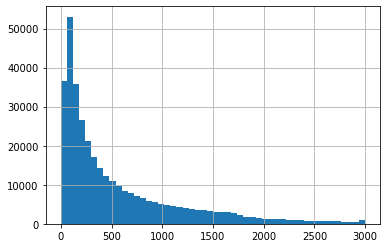

In [11]:
#Сколько длится одна сессия
data_visits['duration_ts'] = (data_visits['end_ts'] - data_visits['start_ts'])/np.timedelta64(1,'s')
data_visits['duration_ts'].hist(bins = 50, range = (0,3000))
data_visits[data_visits['duration_ts'] < 0]

duration_avg = data_visits['duration_ts'].sum()/len(data_visits['duration_ts'])
duration_avg

In [12]:
data_visits['duration_ts'].median()

300.0

In [13]:
data_visits['duration_ts'].mode()

0    60.0
dtype: float64

In [14]:
dau_device_touch = data_visits[data_visits['device'] == 'touch'].groupby('day').agg({'uid': 'nunique'}).reset_index()
dau_device_desktop = data_visits[data_visits['device'] == 'desktop'].groupby('day').agg({'uid': 'nunique'}).reset_index()

wau_device_touch = data_visits[data_visits['device'] == 'touch'].groupby(['device', 'year', 'week']).agg({'uid': 'nunique'}).reset_index()
wau_device_desktop  = data_visits[data_visits['device'] == 'desktop'].groupby(['device', 'year', 'week']).agg({'uid': 'nunique'}).reset_index()

mau_device_touch = data_visits[data_visits['device'] == 'touch'].groupby(['device', 'year', 'month']).agg({'uid': 'nunique'}).reset_index()
mau_device_desktop  = data_visits[data_visits['device'] == 'desktop'].groupby(['device', 'year', 'month']).agg({'uid': 'nunique'}).reset_index()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


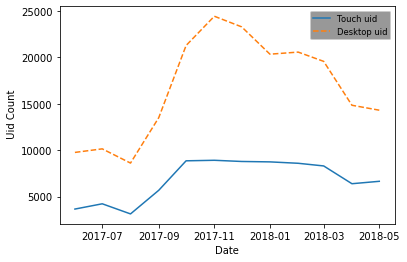

In [15]:
#Изменение по времени
x1 = mau_device_touch['month']
x2 = mau_device_desktop['month']
y1 = mau_device_touch['uid']
y2 = mau_device_desktop['uid']

fig, ax = plt.subplots()
ax.plot(x1, y1, '-', label='Touch uid')
ax.plot(x2, y2 ,'--', label='Desktop uid')

legend = ax.legend(loc='upper right', shadow=False, fontsize='small')
plt.xlabel("Date")
plt.ylabel(" Uid Count")

legend.get_frame().set_facecolor('C7')

plt.show()

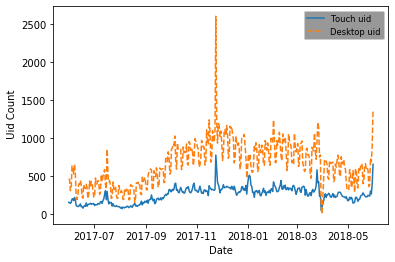

In [16]:
x1 = dau_device_touch['day']
x2 = dau_device_desktop['day']
y1 = dau_device_touch['uid']
y2 = dau_device_desktop['uid']

fig, ax = plt.subplots()
ax.plot(x1, y1, '-', label='Touch uid')
ax.plot(x2, y2 ,'--', label='Desktop uid')

legend = ax.legend(loc='upper right', shadow=False, fontsize='small')
plt.xlabel("Date")
plt.ylabel(" Uid Count")

legend.get_frame().set_facecolor('C7')

plt.show()

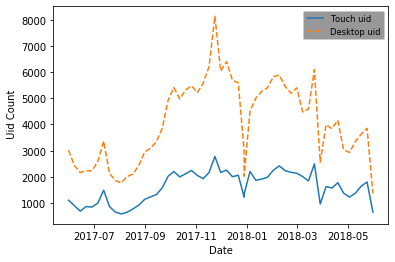

In [17]:
x1 = wau_device_touch['week']
x2 = wau_device_desktop['week']
y1 = wau_device_touch['uid']
y2 = wau_device_desktop['uid']

fig, ax = plt.subplots()
ax.plot(x1, y1, '-', label='Touch uid')
ax.plot(x2, y2 ,'--', label='Desktop uid')

legend = ax.legend(loc='upper right', shadow=False, fontsize='small')
plt.xlabel("Date")
plt.ylabel(" Uid Count")

legend.get_frame().set_facecolor('C7')

plt.show()

In [18]:
#расчет среднего MAU,WAU,DAU по устройствам
dau_device_touch_avg = dau_device_touch['uid'].sum()/len(dau_device_touch['day'])
dau_device_desktop_avg = dau_device_desktop['uid'].sum()/len(dau_device_desktop['day'])

wau_device_touch_avg = wau_device_touch['uid'].sum()/len(wau_device_touch['week'])
wau_device_desktop_avg = wau_device_desktop['uid'].sum()/len(wau_device_desktop['week'])

mau_device_touch_avg = mau_device_touch['uid'].sum()/len(mau_device_touch['month'])
mau_device_desktop_avg = mau_device_desktop['uid'].sum()/len(mau_device_desktop['month'])

print('Количество пользователей в среднем за день на десктопных устройствах =',dau_device_desktop_avg, 
      ", тогда как на сенсорных устройствах =",dau_device_touch_avg)

print('Количество пользователей в среднем за неделю на десктопных устройствах =',wau_device_desktop_avg, 
      ", тогда как на сенсорных устройствах =",wau_device_touch_avg)

print('Количество пользователей в среднем за месяц на десктопных устройствах =',mau_device_desktop_avg, 
      ", тогда как на сенсорных устройствах =",mau_device_touch_avg)


Количество пользователей в среднем за день на десктопных устройствах = 659.2445054945055 , тогда как на сенсорных устройствах = 252.8732782369146
Количество пользователей в среднем за неделю на десктопных устройствах = 4061.5 , тогда как на сенсорных устройствах = 1607.7407407407406
Количество пользователей в среднем за месяц на десктопных устройствах = 16724.916666666668 , тогда как на сенсорных устройствах = 6825.916666666667


<div style="border:solid black 5px; padding: 20px"> 
Вывод: 
    
    Пик среднего количества пользователей в месяц приходится на конец и начало годов рассмотренного периода, что может быть связано с подарочным сезонам, акциями, количеством ивентов и тд.Также стоит отметить, что приложением чаще пользуются с настольной версии, чем с мобильной. Чаще всего(согласно значению моды) время использования приложения составляет примерно 1 минуту, что является рациональным значением для покупки.

Средний RR равен: 0.040638918199616646


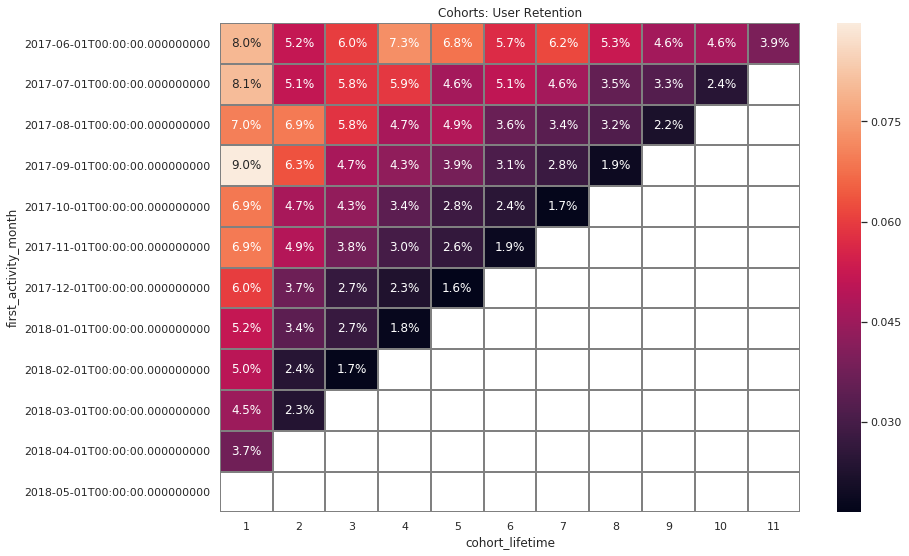

In [19]:
#Как часто люди возвращаются
data_visits = pd.read_csv('/datasets/visits_log.csv')
data_visits = data_visits.rename(columns={"Device": "device", "End Ts": "end_ts", "Source Id": "source_id", "Start Ts": "start_ts", "Uid": "uid"})
data_visits['start_ts'] =pd.to_datetime(data_visits['start_ts'])
data_visits['end_ts'] =pd.to_datetime(data_visits['end_ts'])
data_visits.head()

data_visits['start_ts'] = pd.to_datetime(data_visits['start_ts'])
first_activity_date = data_visits.groupby(['uid'])['start_ts'].min()
first_activity_date.name = 'first_activity_date'
data_visits = data_visits.join(first_activity_date,on='uid',lsuffix='_left')
data_visits['first_activity_month'] = data_visits['first_activity_date'].astype('datetime64[M]')

data_visits['activity_month'] = pd.to_datetime(data_visits['start_ts'], unit='d') - pd.to_timedelta(data_visits['start_ts'].dt.dayofweek, unit='d')


data_visits['cohort_lifetime'] = data_visits['activity_month'] - data_visits['first_activity_month']
data_visits['cohort_lifetime'] = data_visits['cohort_lifetime'] / np.timedelta64(1,'M')
data_visits['cohort_lifetime'] = data_visits['cohort_lifetime'].astype(int)

cohorts = data_visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()


initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','uid']]



initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

cohorts = cohorts.merge(initial_users_count,on='first_activity_month')

cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

retention_pivot = retention_pivot.drop([0], axis=1)


retention_pivot_mean = retention_pivot[0:11].mean(axis = 0).mean()
retention_pivot_mean
print('Средний RR равен:',retention_pivot_mean)




sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')




<div style="border:solid black 5px; padding: 20px"> 
Вывод: 
    
    Для каждой полученной когорты видна отрицательная тендеция количества вернувшихся пользователей, также стоит отметить, как резко произошел отток пользователей после запуска приложения. Средний RR для воозрастов когорт равен 0.4

Среднее время покупки: 60 с.


count    3.652300e+04
mean     1.460411e+06
std      4.067086e+06
min      0.000000e+00
25%      2.400000e+02
50%      9.600000e+02
75%      1.738200e+05
max      3.138864e+07
Name: time_till_buy, dtype: float64

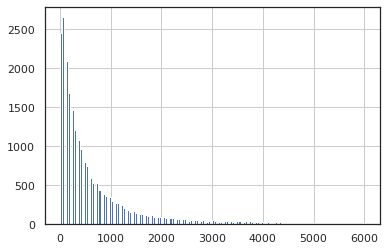

In [20]:
#Когда люди начинают покупать
first_activity = data_visits.groupby(['uid'])['start_ts'].min().reset_index()
first_buy = data_orders_log.groupby(['uid'])['buy_ts'].min().reset_index()
orders_new = (first_buy.merge(first_activity, on ='uid').rename(columns = {'start_ts':'first_activity','buy_ts':'first_buy'}))
orders_new['time_till_buy'] = ((orders_new['first_buy'] - orders_new['first_activity']).dt.total_seconds())
orders_new['first_buy'] = orders_new['first_buy'].astype('datetime64[M]')

#orders_new.plot(x = 'time_till_buy', y='first_buy', 
             #style='o', grid=True, figsize=(12, 6))
orders_new['time_till_buy'].hist(bins = 150, range =(0, 6000))

print('Среднее время покупки:', int(orders_new['time_till_buy'].mode()),'с.' )
orders_new['time_till_buy'].describe()

<div style="border:solid black 5px; padding: 20px"> Вывод:
    
    В среднем, люди начинают покупать спустя минуту использования платформы, на графике моды также можно увидеть, что основное количество пользователей совершает покупки за небольшой диапазон времени. Среднее время покупки: 60 с.

In [21]:
data_orders_log

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


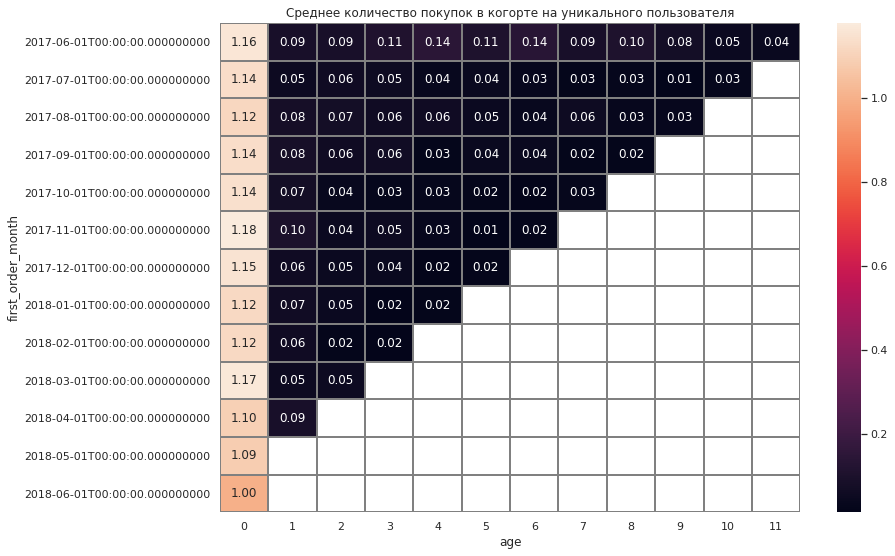

In [22]:
#определим, сколько покупок совершают пользователи за период
first_order_date_by_customers = data_orders_log.groupby('uid')['buy_ts'].min()
first_order_date_by_customers.name = 'first_order_date'
data_orders_log = data_orders_log.join(first_order_date_by_customers,on='uid', lsuffix='_left')
#data_orders_log['first_order_month'] = data_orders_log['first_order_date'].astype('datetime64[M]')
data_orders_log['order_month'] = data_orders_log['buy_ts'].astype('datetime64[M]')

#определим месяц первой покупки каждого пользователя
first_orders = data_orders_log.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
 
#определим количество уникальных покупателей
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
 
#месяц первой покупки каждого пользователя в таблицу с заказами
orders_new = pd.merge(data_orders_log,first_orders, on=['uid'])

#найдем количество заказов для каждого покупателя
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'buy_ts': 'count'}).reset_index()
 
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report

#найдем возвраст каждой когорты
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
 
#найдем накопленное количество покупок
report['rate'] = report['buy_ts'] / report['n_buyers']
 
#построим сводную таблицу для расчета среднего
report_pivot = report.pivot_table(
        index='first_order_month',
        columns='age',
        values='rate',
        aggfunc='mean')
 

 
plt.figure(figsize=(13, 9))
plt.title('Среднее количество покупок в когорте на уникального пользователя')
 
sns.heatmap(report_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray')



In [23]:
report_pivot = report_pivot.cumsum(axis=1)
six_month_cohort_buy = report_pivot[[0,1,2,3,4,5]].head(7)
six_month_cohort_buy_sum = six_month_cohort_buy[0:5].mean(axis = 0)  
print('В среднем люди среди первых семи когорт за пол года покупают:',six_month_cohort_buy_sum)

В среднем люди среди первых семи когорт за пол года покупают: age
0    1.139904
1    1.215010
2    1.279233
3    1.342547
4    1.402449
5    1.454773
dtype: float64


<div style="border:solid black 5px; padding: 20px"> Вывод:
    
    Для каждой из когорт характерен "всплеск" покупок в первый месяц, также как и снижение количества покупок в последующих месяцах. Если сравнивать количество покупок после 6 месяцев между когортами, то можно увидеть снижение активности.В среднем люди среди первых семи когорт за пол года покупают ~1.3 товаров товаров

In [25]:
#Какой средний чек?
#orders_grouped_by_cohorts = data_orders_log.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})
#print(orders_grouped_by_cohorts.head())

#orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']
#pivot_orders = orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean')

#avg_revenue_all = orders_grouped_by_cohorts['revenue_per_user'].sum()/len(orders_grouped_by_cohorts['revenue_per_user'])
#print('Средний чек покупателя:', avg_revenue_all)
#plt.figure(figsize=(13, 9))
#plt.title('Средний чек покупателей')
#sns.heatmap(pivot_orders, annot=True, fmt='.1f', linewidths=1, linecolor='gray')

orders_grouped = data_orders_log.pivot_table(index = 'buy_ts', aggfunc = {'revenue':'sum', 'uid':'nunique'})
orders_grouped['mean_bill'] = orders_grouped['revenue']/orders_grouped['uid']
#orders_grouped = orders_grouped.reset_index()
mean_bill = orders_grouped['mean_bill'].sum()/len(orders_grouped['uid'])
mean_bill


4.99321061367079

In [26]:

orders_grouped = orders_grouped.groupby(['buy_ts'])['mean_bill'].first().reset_index()
orders_grouped = orders_grouped.rename(columns={'buy_ts' : 'activity_month'})

platform_mean_bill = pd.merge(orders_grouped, data_visits, on =['activity_month'])
platform_mean_bill_grouped = platform_mean_bill.groupby('device')['mean_bill'].sum()
platform_mean_bill_grouped

device
desktop    188958.585
touch       66191.420
Name: mean_bill, dtype: float64

<div style="border:solid black 5px; padding: 20px"> Вывод:
    
    Средний чек покупателя: ~ 5. Сумма средних чеков покупателей больше на десктопных платформах, чем на мобильных почти в 3 раза

In [27]:
data_orders_log = pd.read_csv('/datasets/orders_log.csv')
data_orders_log = data_orders_log.rename(columns={"Buy Ts": "buy_ts", "Revenue": "revenue","Uid": "uid"})
data_orders_log['buy_ts'] =pd.to_datetime(data_orders_log['buy_ts'])


#(LTV) Маркетинг Сколько денег потратили?
data_orders_log['order_month'] = data_orders_log['buy_ts'].astype('datetime64[M]')
data_costs['month'] = data_costs['dt'].astype('datetime64[M]')

#Получим месяц первой покупки каждого покупателя:
first_orders = data_orders_log.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']


#Посчитаем количество новых покупателей (n_buyers) за каждый месяц:
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()


,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [28]:
#Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:
orders_new = pd.merge(data_orders_log,first_orders, on='uid')
display(orders_new.head())

#Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку. Сбросим индекс методом reset_index():
cohorts = orders_new.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
display(cohorts.head())

#С Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
margin_rate = 1    
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()



,buy_ts,revenue,uid,order_month,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01


,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4


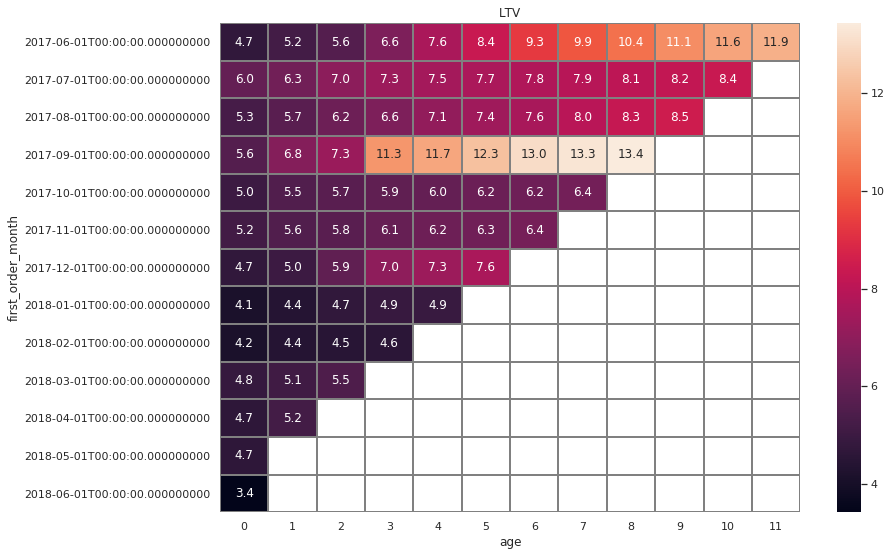

In [29]:
#Найдём LTV. Разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.
report['ltv'] = report['gp'] / report['n_buyers']
    
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='ltv', 
        aggfunc='mean')

  
plt.figure(figsize=(13, 9))
plt.title('LTV')
sns.heatmap(output.cumsum(axis = 1), annot=True, fmt='.1f', linewidths=1, linecolor='gray')

In [30]:
#Посчитаем итоговый LTV первой когорты. Сложим их LTV по месяцам:
ltv_201706 = output.loc['2017-06-01'].sum()
print(ltv_201706)


#Посчитаем CAC этой когорты. Поделим расходы за этот месяц на количество людей в когорте:
# отфильруем нужную когорту
cohort_201706 = report[report['first_order_month'] == '2017-06-01']

# посчитаем расходы за этот месяц
costs_201706 = data_costs[data_costs['month'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706)
#Привлечение одного покупателя в среднем обошлось компании в 8.9 рублей. 
#Валовая прибыль с каждого из них: 11.8 рублей. То есть вложения в привлечение покупателей окупились, и у платформы остались деньги на прочие расходы.




11.879233811171527
CAC = 8.905091448344043
LTV = 11.879233811171527


In [31]:
six_month_cohort_ltv = output[[0,1,2,3,4,5]].head(7)
six_month_cohort_ltv_sum = six_month_cohort_ltv[0:5].sum().mean()  
print('Средний LTV первых семи когорт за пол года:',six_month_cohort_ltv_sum)

Средний LTV первых семи когорт за пол года: 6.977189835177392


In [32]:
#Добавим данные о расходах в отчёт и посчитаем CAC:
monthly_costs = data_costs.groupby('month').sum().reset_index()
monthly_costs

report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new.head()



#output_cac = report_new.pivot_table(
        #index='first_order_month', 
        #columns='age', 
        #values='cac', 
        #aggfunc='mean')
#output_cac

#six_month_cohort_cac = output_cac[[0,1,2,3,4,5]].head(7)
#six_month_cohort_cac_sum = output_cac.sum()/report_new['n_buyers'].sum()
#print('Средний CAC первых шести когорт за пол года:',six_month_cohort_cac_sum)

#report_cac = report_new.groupby('first_order_month')['cac'].sum().reset_index()
#report_cac


#В среднем потратили на одного пользователя в каждой когорте
report_cac = report_new.groupby('first_order_month')['cac'].mean().reset_index()
report_cac

,first_order_month,cac
0,2017-06-01,8.905091
1,2017-07-01,9.485486
2,2017-08-01,10.796015
3,2017-09-01,9.441654
4,2017-10-01,8.369327
5,2017-11-01,9.288870
6,2017-12-01,8.741809
7,2018-01-01,9.937302
8,2018-02-01,8.962758
9,2018-03-01,8.608907


In [33]:
#Потратили всего
print('Всего на рекламу потратили:',data_costs['costs'].sum())

Всего на рекламу потратили: 329131.62


age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

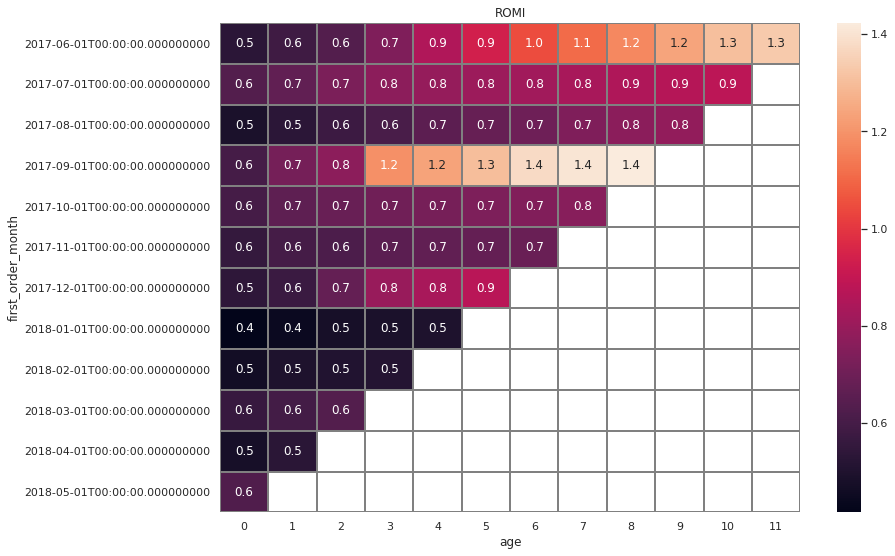

In [34]:
#Посчитаем остальные когорты и посмотрим, сколько месяцев нужно каждой когорте, чтобы окупить маркетинговые затраты. Посчитаем CAC каждой когорты. Сначала найдём суммарные расходы за каждый месяц, а затем поделим их на количество покупателей в каждой когорте:
# считаем расходы за месяц

#Рассчитаем общий ROMI: поделим LTV на CAC.




report_new['romi'] = report_new['ltv'] / report_new['cac']
output_new = report_new.pivot_table(
        index=['first_order_month'], 
        columns='age', 
        values='romi', 
        aggfunc='mean')

plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(output_new.cumsum(axis = 1), annot=True, fmt='.1f', linewidths=1, linecolor='gray')

#Читаем отчет:
output_new.cumsum(axis=1).mean(axis=0)

#В среднем когорты начинают окупаться после 7 месяца


<div style="border:solid black 5px; padding: 20px"> Вывод:
    
    В среднем, когорты начинают окупаться после 7-го месяца

month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,0.372779,0.554498,0.674227,0.671417,0.724711,0.694824,0.798599,0.914686,1.084860,1.036227,0.938780,1.182029
2,0.486357,0.686596,0.763725,0.811754,1.012847,0.969807,1.318352,1.424959,1.696486,1.589511,1.613211,1.887372
3,1.123611,1.392096,1.488386,1.408985,1.585700,1.567714,1.813159,1.858666,1.793193,2.021536,2.072496,2.343628
4,0.544632,0.552005,0.717357,0.692183,0.561999,0.439093,0.636679,0.602282,0.659273,0.730608,0.737785,0.748549
5,0.571407,0.636289,0.580420,0.641839,0.678897,0.845558,0.918599,0.935995,0.920009,1.107032,0.774257,1.052765
9,0.237599,0.404746,0.419162,0.501048,0.518928,0.566194,0.775361,0.901010,1.290732,0.935821,1.757551,2.527973
10,0.615057,0.861493,0.820102,0.831410,0.691153,0.764519,1.029716,0.810300,0.477977,0.531923,0.845236,0.848394


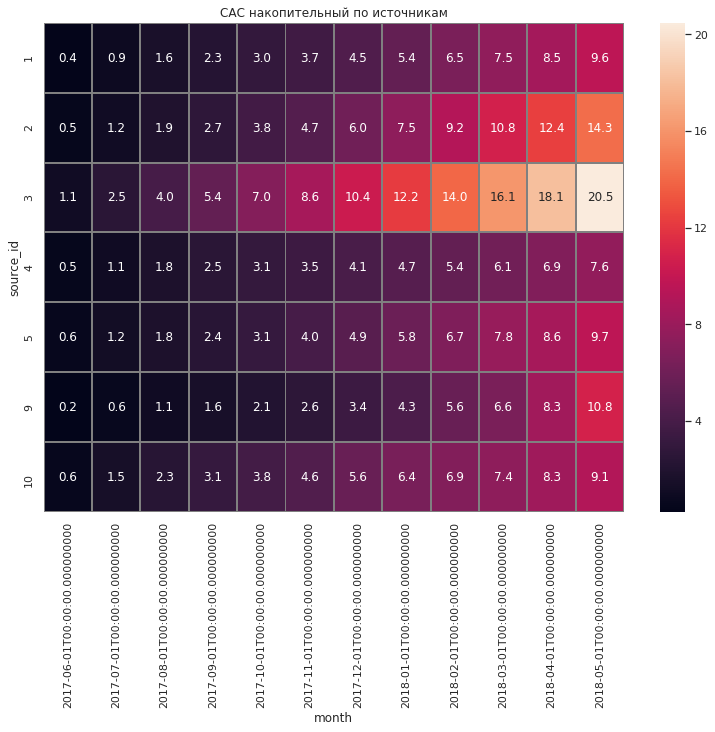

In [35]:
#потратили на привлечение (САС) по источникам

data_visits['first_activity_date'] = data_visits['first_activity_date'].astype('datetime64[D]')
data_visits['month'] = data_visits['start_ts'].astype('datetime64[M]')


data_vis = data_visits.groupby(['first_activity_date' ,'source_id']).agg({'uid': 'count'}).reset_index()
data_vis = data_vis.rename(columns={"first_activity_date": "dt", "uid":"uid_count"})
data_vis

attraction = pd.merge(data_vis,data_costs, on = ['source_id', 'dt'])
attraction['costs_per_uid'] = attraction['costs']/attraction['uid_count']
attraction_grouped = attraction.groupby(['source_id', 'month']).agg({'costs_per_uid': 'mean'}).reset_index()


output = attraction_grouped.pivot_table(
        index=['source_id'], 
        columns='month', 
        values='costs_per_uid', 
        aggfunc='sum')

plt.figure(figsize=(13, 9))
plt.title('CAC накопительный по источникам')
sns.heatmap(output.cumsum(axis = 1), annot=True, fmt='.1f', linewidths=1, linecolor='gray')
output

<div style="border:solid black 5px; padding: 20px"> Вывод:
    
    Больше всего на привлечение пользователей потратились на 2 и 3 каналы

In [36]:

data_visits_rt= data_visits.sort_values(by='start_ts',ascending=True)
data_visits_rt = data_visits.groupby(['uid'])['source_id'].first().reset_index()
data_visits_rt = data_visits_rt.rename(columns = {'source_id' : 'first_source_id'})
data_visits_rt_new = pd.merge(data_visits, data_visits_rt, on ='uid')
data_visits_rt_new =  data_visits_rt_new.rename(columns = {'first_activity_month' : 'first_order_month'})
data_visits_rt_new

,device,end_ts,source_id,start_ts,uid,first_activity_date,first_order_month,activity_month,cohort_lifetime,month,first_source_id
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,2017-12-01,2017-12-18 17:20:00,0,2017-12-01,4
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,2018-02-01,2018-02-19 16:53:00,0,2018-02-01,2
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,2017-07-01,2017-06-26 01:54:00,0,2017-07-01,5
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-03-09,2018-03-01,2018-05-14 10:59:00,2,2018-05-01,9
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,2018-03-01,2018-03-05 20:05:00,0,2018-03-01,9
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2018-04-23 21:19:00,10,2018-04-23 21:11:00,12734910664455613822,2018-04-23,2018-04-01,2018-04-23 21:11:00,0,2018-04-01,10
359396,desktop,2017-11-08 13:39:00,4,2017-11-08 13:39:00,6761309174945977743,2017-11-08,2017-11-01,2017-11-06 13:39:00,0,2017-11-01,4
359397,desktop,2017-07-31 12:31:00,3,2017-07-31 12:13:00,11102751930812818282,2017-07-31,2017-07-01,2017-07-31 12:13:00,1,2017-07-01,3
359398,desktop,2018-03-20 15:25:00,4,2018-03-20 15:11:00,272012551460639309,2018-03-20,2018-03-01,2018-03-19 15:11:00,0,2018-03-01,4


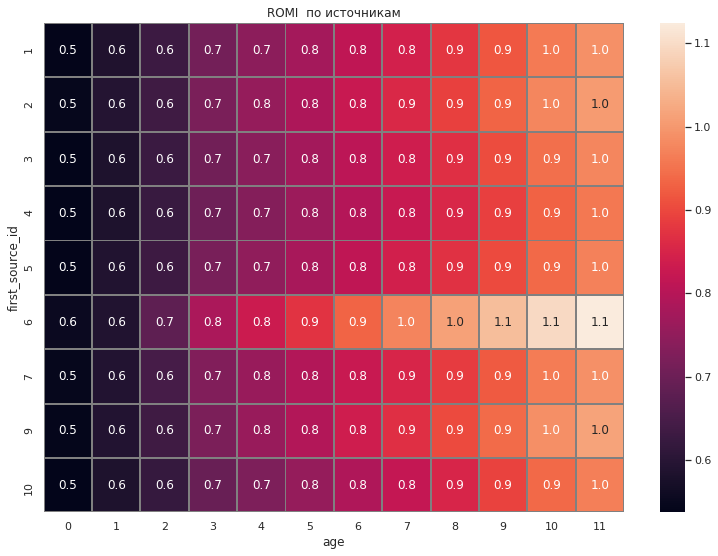

In [37]:
#romi  в разрезе источников
report_new_rt = pd.merge(report_new,data_visits_rt_new , on=['first_order_month','month'])
report_new_rt

report_new_rt
output_rt = report_new_rt.pivot_table(
        index=['first_source_id'], 
        columns='age', 
        values='romi', 
        aggfunc='mean')

plt.figure(figsize=(13, 9))
plt.title('ROMI  по источникам')
sns.heatmap(output_rt.cumsum(axis = 1), annot=True, fmt='.1f', linewidths=1, linecolor='gray')

<div style="border:solid black 5px; padding: 20px"> Вывод:
    
       Привлечение одного покупателя в среднем обошлось компании в 55 ден.ед. 
       Валовая прибыль с каждого из них: 8 ден.ед. 
       В среднем когорты начинают окупаться после 7 месяца
       С каждым месяцем на привлечение клиентов тратится все меньше.
       Самыми окупаемым является 6 источник, самыми "дорогими" оказались 2 и 3

# Шаг 3.


## Выводы

<div style="border:solid black 5px; padding: 20px; background-color:lightblue">
    При оценке перспективности платформ и источников для вложения я ориентировался на такие метрики, как Retention rate и ROMI, потому что     они явно отображают заинтересованность пользователей и целесообразность для вложений на развитие.
   Наиболее популярной и прибыльной(исходя из суммарного среднего чека) платформой является desktop приложение, а самыми окупаемыми источником 6. Также стоит отметить такие       источники, как 1,2 и 3, которые демонстрировали стабильную  окупаемость без значительных падений показатели. Именно их я бы     рекомендовал для вложения денег, наряду с 9 и 10 источниками на desktop платформе.
    

    